___
# Ciência dos Dados - PROJETO 1

## Emanuelle Silva Moço

## Descrever os domicílios brasileiros quanto ao acesso à Internet e à Televisão

Como a condição de ocupação de domicílio influencia no acesso à Internet e Televisão no âmbito regional?

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('ggplot')

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Emanuelle\Documents\Ciência dos Dados\Projeto 1


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')
dados = pd.read_csv('DOM2015.csv',sep=',')



In [4]:
tabela = dados.loc [:,["UF", "V4621","V0207", "V02322","V02273", "V02274", "V4105"]]
                                                                              
#V4621 Renda per capita",
#V0207 Condição de ocupação do domicílio
#V02322":"Acesso à Internet no domicilio
#V02273":"Tem televisão com recepçao de sinal digital de tv aberta",
#V02274" : "Tem televisão com antena parabólica
#V4105":"Situação censitária da moradia"    


tabela.head()

,UF,V4621,V0207,V02322,V02273,V02274,V4105
0,11,800.0,3.0,4.0,1.0,3.0,1
1,11,NaN,NaN,NaN,NaN,NaN,1
2,11,1150.0,3.0,2.0,NaN,NaN,1
3,11,793.0,1.0,2.0,1.0,3.0,1
4,11,2900.0,1.0,4.0,NaN,NaN,1


In [5]:
dados_nao_nulos = tabela[pd.notnull(dados.UF)&pd.notnull(dados.V4621)&pd.notnull(dados.V0207)&pd.notnull(dados.V02322)&pd.notnull(dados.V02273)&pd.notnull(dados.V02274)&pd.notnull(dados.V4105)]
dados_nao_nulos = dados_nao_nulos[dados.V4621!=999999999999]

dados_nao_nulos.head()

C:\Users\Emanuelle\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,UF,V4621,V0207,V02322,V02273,V02274,V4105
0,11,800.0,3.0,4.0,1.0,3.0,1
3,11,793.0,1.0,2.0,1.0,3.0,1
5,11,1990.0,1.0,2.0,1.0,1.0,1
6,11,350.0,1.0,4.0,1.0,3.0,1
7,11,1333.0,1.0,4.0,1.0,3.0,1


In [6]:
#tabela.head()  #para mostrar os 5 primeiros elemetos

#dados_nao_nulos.to_csv("resumo.csv")
#tabela.to_csv("resumo.csv") #para salvar

In [7]:
#Definindo as variáveis qualitativas como categóricas
dados_nao_nulos.UF = dados.UF.astype('category')
dados_nao_nulos.UF.cat.categories = (['Rondônia', 'Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piaui','Ceará','Rio Grande do Norte','Paraíba','Pernamnuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espirito Santo','Rio de janeiro','Sâo Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])

dados_nao_nulos.V0207 = dados.V0207.astype('category')
dados_nao_nulos.V0207.cat.categories = (['Próprio - pago', 'Próprio - pagando', 'Alugado','Cedido por empregador', 'Cedido outra forma', 'Outro'])

dados_nao_nulos.V02322 = dados.V02322.astype('category')
dados_nao_nulos.V02322.cat.categories = (['Sim', 'Não'])

dados_nao_nulos.V02273 = dados.V02273.astype('category')
dados_nao_nulos.V02273.cat.categories = (['Sim', 'Não', 'Não sabe'])

dados_nao_nulos.V02274 = dados.V02274.astype('category')
dados_nao_nulos.V02274.cat.categories = (['Sim', 'Não', 'Não sabe'])

dados_nao_nulos.V4105 = dados.V4105.astype('category')
dados_nao_nulos.V4105.cat.categories = (['URBANA - Cidade ou vila, área urbanizada','URBANA - Cidade ou vila, área não urbanizada','URBANA - Área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural'])

#dados_nao_nulos.head()

In [8]:
#criar uma nova coluna 'Tem sinal TV'
dados_nao_nulos.loc[(dados_nao_nulos.V02273=='Sim') | (dados_nao_nulos.V02274=='Sim'), 'Tem_sinal_TV'] = 'Sim'
dados_nao_nulos.loc[(dados_nao_nulos.V02273=='Não') & (dados_nao_nulos.V02274=='Não'), 'Tem_sinal_TV'] = 'Não'
dados_nao_nulos.loc[(dados_nao_nulos.V02273=='Sim') & (dados_nao_nulos.V02274=='Não'), 'Tem_sinal_TV'] = 'Sim'
dados_nao_nulos.loc[(dados_nao_nulos.V02273=='Não') & (dados_nao_nulos.V02274=='Sim'), 'Tem_sinal_TV'] = 'Sim'

#criar uma nova coluna 'Área'
dados_nao_nulos.loc[(dados_nao_nulos.V4105=='URBANA - Cidade ou vila, área urbanizada') | (dados_nao_nulos.V4105=='URBANA - Cidade ou vila, área não urbanizada'), 'Área'] = 'Urbana'
dados_nao_nulos.loc[(dados_nao_nulos.V4105=='URBANA - Área urbana isolada'), 'Área'] = 'Urbana'
dados_nao_nulos.loc[(dados_nao_nulos.V4105=='RURAL - Aglomerado rural de extensão urbana') | (dados_nao_nulos.V4105=='RURAL - Aglomerado rural de extensão urbana'), 'Área'] = 'Rural'
dados_nao_nulos.loc[(dados_nao_nulos.V4105=='RURAL - Aglomerado rural, isolado, núcleo') | (dados_nao_nulos.V4105=='RURAL - Aglomerado rural, isolado, outros aglomerados'), 'Área'] = 'Rural'
dados_nao_nulos.loc[(dados_nao_nulos.V4105=='RURAL - Zona rural exclusive aglomerado rural'), 'Área'] = 'Rural'

#criar uma nova coluna Região
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Rondônia') | (dados_nao_nulos.UF=='Acre') | (dados_nao_nulos.UF=='Amazonas') | (dados_nao_nulos.UF=='Roraima') | (dados_nao_nulos.UF=='Pará') | (dados_nao_nulos.UF=='Amapá') | (dados_nao_nulos.UF=='Tocantins'),'Regiao'] = 'Norte'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Maranhão') | (dados_nao_nulos.UF=='Piaui') | (dados_nao_nulos.UF=='Caerá') | (dados_nao_nulos.UF=='Rio Grande do Norte') | (dados_nao_nulos.UF=='Paraíba') | (dados_nao_nulos.UF=='Pernambuco') | (dados_nao_nulos.UF=='Alagoas') | (dados_nao_nulos.UF=='Sergipe') | (dados_nao_nulos.UF=='Bahia'),'Regiao'] = 'Nordeste'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Minas Gerais') | (dados_nao_nulos.UF=='Espirito Santo') | (dados_nao_nulos.UF=='Rio de Janeiro') | (dados_nao_nulos.UF=='São Paulo'),'Regiao'] = 'Sudeste'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Paraná') | (dados_nao_nulos.UF=='Santa Catarina') | (dados_nao_nulos.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
dados_nao_nulos.loc[(dados_nao_nulos.UF=='Mato Grosso do Sul') | (dados_nao_nulos.UF=='Mato Grosso') | (dados_nao_nulos.UF=='Goiás') | (dados_nao_nulos.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'


#dados_nao_nulos.head()

In [9]:
#criar uma nova tabela com os dados selecionados
nova_tabela = dados_nao_nulos.loc [:,["UF", "Regiao", "V4621","V0207", "V02322", "Tem_sinal_TV", "Área"]]   

#PARA RENOMEAR as colunas da tabela
nova_tabela = nova_tabela.rename(columns = {"V4621":"Renda_per_capita","V0207":"Condição_de_ocupação","V02322":"Acesso_Internet"})




In [10]:
#criar tabelas pros estados
tabela_Norte = nova_tabela[nova_tabela.Regiao == "Norte"]
tabela_Nordeste = nova_tabela[nova_tabela.Regiao == "Nordeste"]
tabela_Centroeste = nova_tabela[nova_tabela.Regiao == "Centroeste"]
tabela_Sul = nova_tabela[nova_tabela.Regiao == "Sul"]
tabela_Sudeste = nova_tabela[nova_tabela.Regiao == "Sudeste"]


In [11]:
tabela_Nordeste.head()
#nova_tabela[nova_tabela.Área=='Rural']

,UF,Regiao,Renda_per_capita,Condição_de_ocupação,Acesso_Internet,Tem_sinal_TV,Área
21442,Maranhão,Nordeste,1576.0,Próprio - pago,Não,Não,Urbana
21443,Maranhão,Nordeste,394.0,Próprio - pago,Não,Sim,Urbana
21444,Maranhão,Nordeste,436.0,Próprio - pago,Sim,Sim,Urbana
21447,Maranhão,Nordeste,62.0,Próprio - pago,Não,Sim,Urbana
21448,Maranhão,Nordeste,187.0,Próprio - pago,Sim,Sim,Urbana


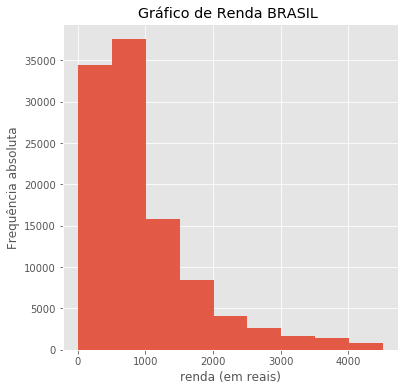

In [12]:
#RENDA BRASIL
faixa = range(10,5000,500)
renda_Brasil = pd.cut(nova_tabela.Renda_per_capita, bins=faixa)
renda_Brasil.value_counts(sort=False, normalize=True)*100
plot = nova_tabela.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda BRASIL ', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

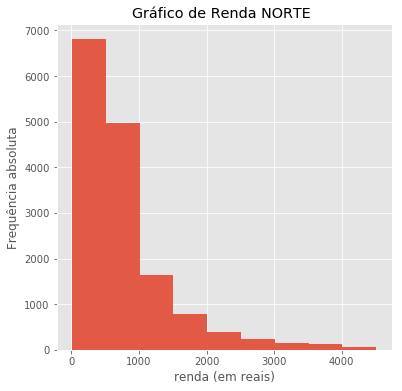

In [13]:
#RENDA NORTE
faixa = range(10,5000,500)
renda_Norte = pd.cut(tabela_Norte.Renda_per_capita, bins=faixa)
renda_Norte.value_counts(sort=False, normalize=True)*100
plot = tabela_Norte.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda NORTE ', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

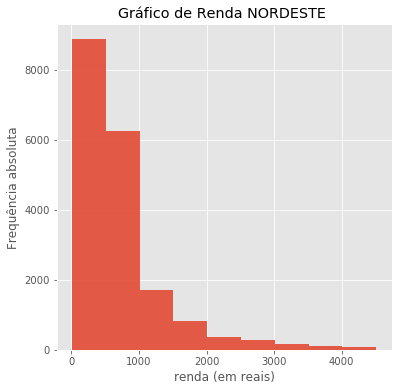

In [14]:
#RENDA NORDESTE
faixa = range(10,5000,500)
renda_Nordeste = pd.cut(tabela_Nordeste.Renda_per_capita, bins=faixa)
renda_Nordeste.value_counts(sort=False, normalize=True)*100
plot = tabela_Nordeste.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda NORDESTE ', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

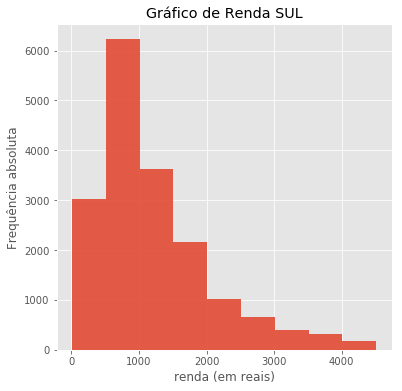

In [15]:
#RENDA SUL
faixa = range(10,5000,500)
renda_Sul = pd.cut(tabela_Sul.Renda_per_capita, bins=faixa)
renda_Sul.value_counts(sort=False, normalize=True)*100
plot = tabela_Sul.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda SUL', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

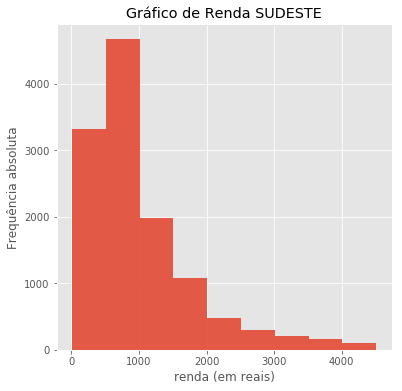

In [16]:
#RENDA SUDESTE
faixa = range(10,5000,500)
renda_Sudeste = pd.cut(tabela_Sudeste.Renda_per_capita, bins=faixa)
renda_Sudeste.value_counts(sort=False, normalize=True)*100
plot = tabela_Sudeste.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda SUDESTE', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

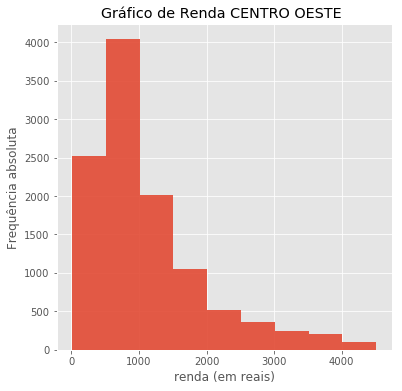

In [17]:
#RENDA CENTRO OESTE
faixa = range(10,5000,500)
renda_CentroOeste = pd.cut(tabela_Centroeste.Renda_per_capita, bins=faixa)
renda_CentroOeste.value_counts(sort=False, normalize=True)*100
plot = tabela_Centroeste.Renda_per_capita.plot.hist(bins=faixa,title='Gráfico de Renda CENTRO OESTE ', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

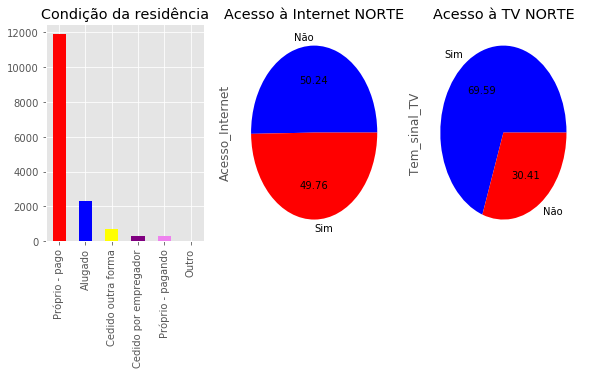

In [18]:
fig = plt.figure(figsize = (13,4))
plt.subplot(141)
plt.title("Condição da residência")
condicao_Norte = tabela_Norte.Condição_de_ocupação.value_counts()
condicao_Norte.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)


plt.subplot(142)
plt.title("Acesso à Internet NORTE")
internet_Norte = tabela_Norte.Acesso_Internet.value_counts()
internet_Norte.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


plt.subplot(143)
plt.title("Acesso à TV NORTE")
tv_Norte = tabela_Norte.Tem_sinal_TV.value_counts()
tv_Norte.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)




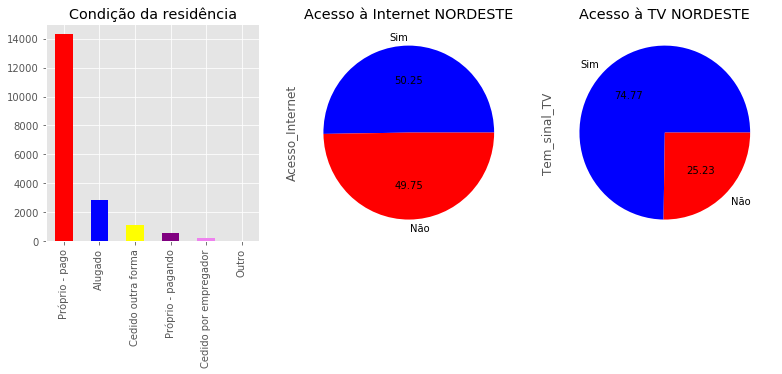

In [19]:
fig = plt.figure(figsize = (13,4))
plt.subplot(131)
plt.title("Condição da residência")
condicao_Nordeste = tabela_Nordeste.Condição_de_ocupação.value_counts()
condicao_Nordeste.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

plt.subplot(132)
plt.title("Acesso à Internet NORDESTE")
internet_Nordeste = tabela_Nordeste.Acesso_Internet.value_counts()
internet_Nordeste.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


plt.subplot(133)
plt.title("Acesso à TV NORDESTE")
tv_Nordeste = tabela_Nordeste.Tem_sinal_TV.value_counts()
tv_Nordeste.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)



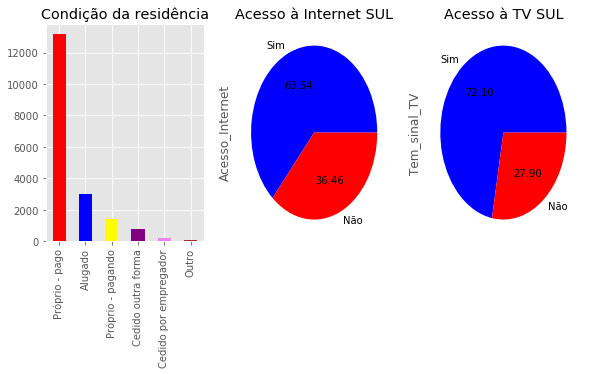

In [20]:
fig = plt.figure(figsize = (13,4))
plt.subplot(141)
plt.title("Condição da residência")
condicao_Sul = tabela_Sul.Condição_de_ocupação.value_counts()
condicao_Sul.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

plt.subplot(142)
plt.title("Acesso à Internet SUL")
internet_Sul = tabela_Sul.Acesso_Internet.value_counts()
internet_Sul.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


plt.subplot(143)
plt.title("Acesso à TV SUL")
tv_Sul = tabela_Sul.Tem_sinal_TV.value_counts()
tv_Sul.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)

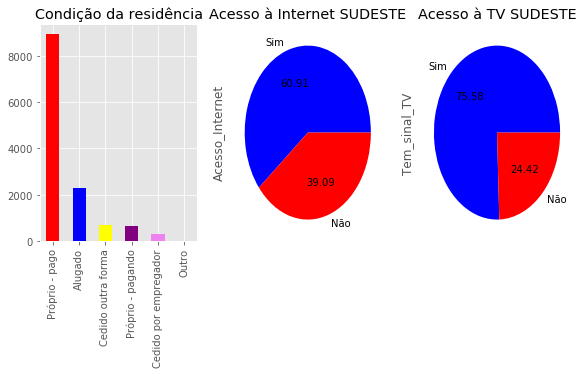

In [21]:
fig = plt.figure(figsize = (13,4))
plt.subplot(141)
plt.title("Condição da residência")
condicao_Sudeste = tabela_Sudeste.Condição_de_ocupação.value_counts()
condicao_Sudeste.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

plt.subplot(142)
plt.title("Acesso à Internet SUDESTE")
internet_Sudeste = tabela_Sudeste.Acesso_Internet.value_counts()
internet_Sudeste.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


plt.subplot(143)
plt.title("Acesso à TV SUDESTE")
tv_Sudeste = tabela_Sudeste.Tem_sinal_TV.value_counts()
tv_Sudeste.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)

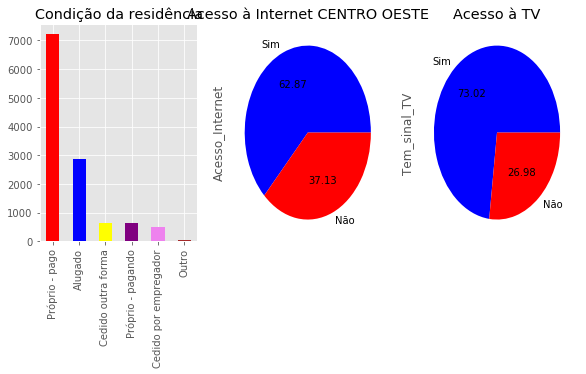

In [22]:
fig = plt.figure(figsize = (13,4))
plt.subplot(141)
plt.title("Condição da residência")
condicao_Centroeste = tabela_Centroeste.Condição_de_ocupação.value_counts()
condicao_Centroeste.plot(kind='bar', color=('red', 'blue','yellow','purple','violet','Brown','Pink','Green'), legend=False)

plt.subplot(142)
plt.title("Acesso à Internet CENTRO OESTE")
internet_Centroeste = tabela_Centroeste.Acesso_Internet.value_counts()
internet_Centroeste.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


plt.subplot(143)
plt.title("Acesso à TV")
tv_Centroeste = tabela_Centroeste.Tem_sinal_TV.value_counts()
tv_Centroeste.plot(kind='pie', colors=('blue','red'), autopct="%0.2f",legend=False)


In [23]:
#teste = tabela_Sul.iloc[0:5,:]
#plot = teste.Área.plot(kind='bar', stacked=True,title='Educação por Default')
#plot.set_ylim([0, 100])
#plt.ylabel('Freq.Relativa (em%)')
#
#Para legenda ficar fora do gráfico
#ax = plt.subplot(111)
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [24]:
#bocplot

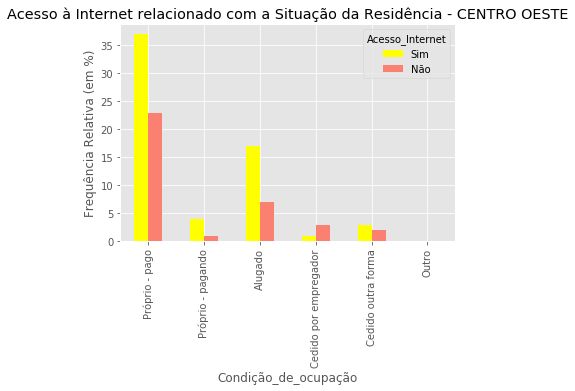

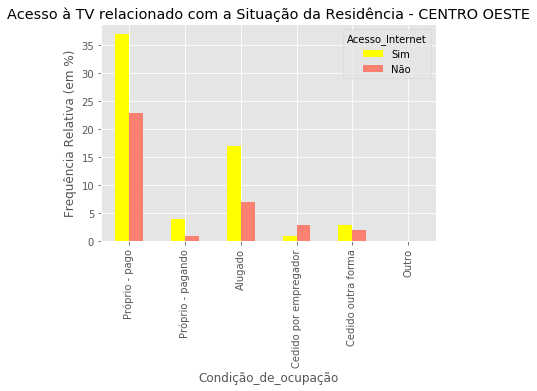

In [57]:
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_centroeste = pd.crosstab(tabela_Centroeste.Condição_de_ocupação, tabela_Centroeste.Acesso_Internet)
ct_in_centroeste = (ct_in_centroeste/ct_in_centroeste.sum().sum()*100).round(decimals=0)
ct_in_centroeste.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("Acesso à Internet relacionado com a Situação da Residência - CENTRO OESTE")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_centroeste = pd.crosstab(tabela_Centroeste.Condição_de_ocupação, tabela_Centroeste.Acesso_Internet)
ct_tv_centroeste = (ct_tv_centroeste/ct_tv_centroeste.sum().sum()*100).round(decimals=0)
ct_tv_centroeste.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("Acesso à TV relacionado com a Situação da Residência - CENTRO OESTE")
plt.ylabel('Frequência Relativa (em %)')

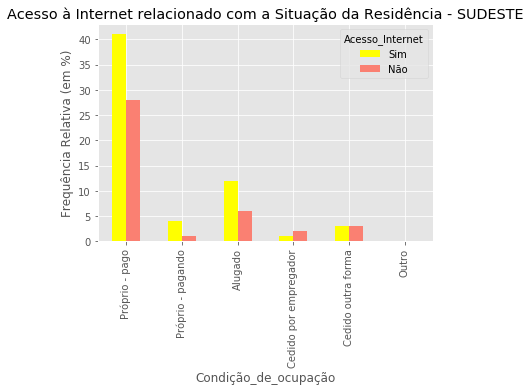

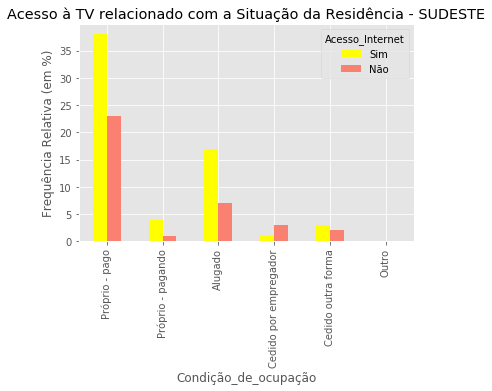

In [62]:
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_Sudeste = pd.crosstab(tabela_Sudeste.Condição_de_ocupação, tabela_Sudeste.Acesso_Internet)
ct_in_Sudeste = (ct_in_Sudeste/ct_in_Sudeste.sum().sum()*100).round(decimals=0)
ct_in_Sudeste.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("Acesso à Internet relacionado com a Situação da Residência - SUDESTE")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Sudeste = pd.crosstab(tabela_Sudeste.Condição_de_ocupação, tabela_Sudeste.Acesso_Internet)
ct_tv_Sudeste = (ct_tv_centroeste/ct_tv_centroeste.sum().sum()*100).round(decimals=0)
ct_tv_Sudeste.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("Acesso à TV relacionado com a Situação da Residência - SUDESTE")
plt.ylabel('Frequência Relativa (em %)')

In [ ]:
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_Sul = pd.crosstab(tabela_Sul.Condição_de_ocupação, tabela_Sul.Acesso_Internet)
ct_in_Sul = (ct_in_Sudeste/ct_in_Sudeste.sum().sum()*100).round(decimals=0)
ct_in_Sul.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("Acesso à Internet relacionado com a Situação da Residência - SUL")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Sul = pd.crosstab(tabela_Sul.Condição_de_ocupação, tabela_Sul.Acesso_Internet)
ct_tv_Sudeste = (ct_tv_centroeste/ct_tv_centroeste.sum().sum()*100).round(decimals=0)
ct_tv_Sudeste.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("Acesso à TV relacionado com a Situação da Residência - SUL")
plt.ylabel('Frequência Relativa (em %)')

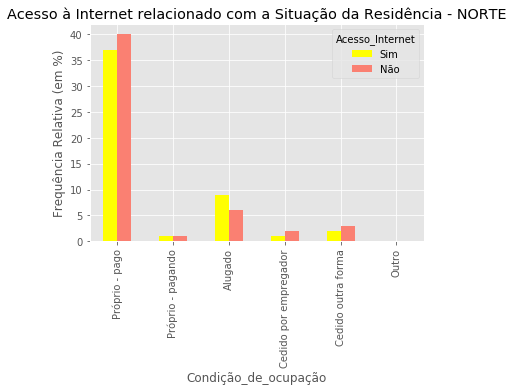

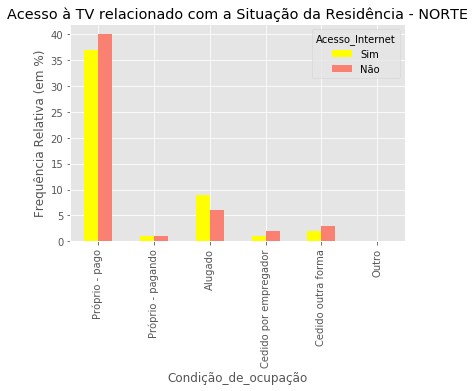

In [65]:
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_Norte = pd.crosstab(tabela_Norte.Condição_de_ocupação, tabela_Norte.Acesso_Internet)
ct_in_Norte = (ct_in_Norte/ct_in_Norte.sum().sum()*100).round(decimals=0)
ct_in_Norte.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("Acesso à Internet relacionado com a Situação da Residência - NORTE")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Norte = pd.crosstab(tabela_Norte.Condição_de_ocupação, tabela_Norte.Acesso_Internet)
ct_tv_Norte = (ct_tv_Norte/ct_tv_Norte.sum().sum()*100).round(decimals=0)
ct_tv_Norte.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("Acesso à TV relacionado com a Situação da Residência - NORTE")
plt.ylabel('Frequência Relativa (em %)')

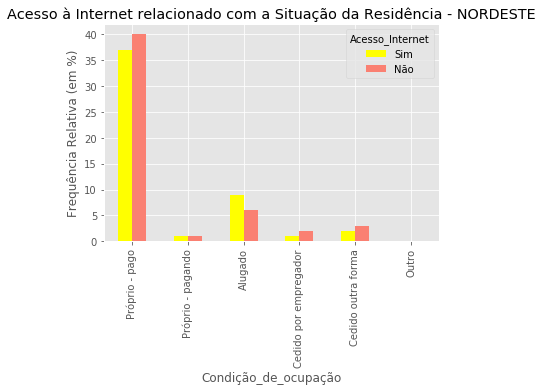

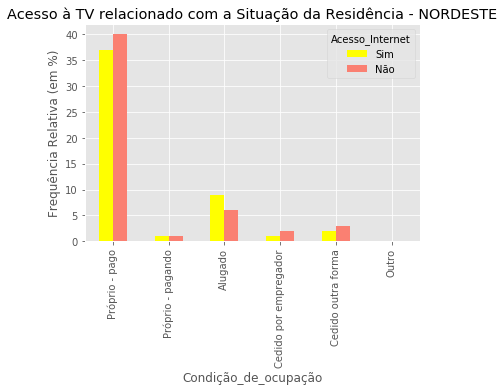

In [66]:
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_Nordeste = pd.crosstab(tabela_Norte.Condição_de_ocupação, tabela_Norte.Acesso_Internet)
ct_in_Nordeste = (ct_in_Nordeste/ct_in_Nordeste.sum().sum()*100).round(decimals=0)
ct_in_Nordeste.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("Acesso à Internet relacionado com a Situação da Residência - NORDESTE")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Nordeste = pd.crosstab(tabela_Norte.Condição_de_ocupação, tabela_Norte.Acesso_Internet)
ct_tv_Nordeste = (ct_tv_Nordeste/ct_tv_Nordeste.sum().sum()*100).round(decimals=0)
ct_tv_Nordeste.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("Acesso à TV relacionado com a Situação da Residência - NORDESTE")
plt.ylabel('Frequência Relativa (em %)')


___
## Conclusão 


Dentre as residências que estão em condição "Prórpia, mas ainda pagando" e "Alugada", vemos que nas casas que ainda estão sendo pagas, o índice do uso de internet e TV é bem menor em relação às residências alugadas. Isso pode estar ligado ao fato de que,
Segundo um levantamento do portal imobiliário Properati, a primeira prestação do imóvel financiado, em alguns lugares do Brasil, custa o dobro que o aluguel médio, e a parcela só fica mais barata do que a locação no 20º ano de um financiamento de 30 anos. Ou seja, os indivíduos que moram em residências própria, mas que ainda estão sendo paga, têm um gasto significantemente maior do que aqueles que moram em residências alugadas, tendo assim, como conseguência, um poder aquisitivo dos que vivem em casas alugadas um tanto quanto maior, possibilitando gastos em outras áreas de intertenimento, como TV e Internet.

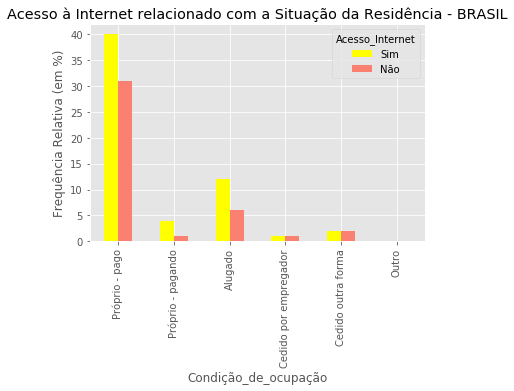

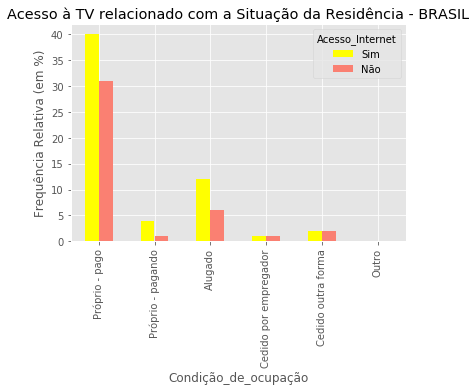

In [68]:
#fig = plt.figure(figsize = (8,2))
#plt.subplot(131)
ct_in_Brasil = pd.crosstab(nova_tabela.Condição_de_ocupação, nova_tabela.Acesso_Internet)
ct_in_Brasil = (ct_in_Brasil/ct_in_Brasil.sum().sum()*100).round(decimals=0)
ct_in_Brasil.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("Acesso à Internet relacionado com a Situação da Residência - BRASIL")
plt.ylabel('Frequência Relativa (em %)')

#plt.subplot(132)
ct_tv_Brasil = pd.crosstab(nova_tabela.Condição_de_ocupação, nova_tabela.Acesso_Internet)
ct_tv_Brasil = (ct_tv_Brasil/ct_tv_Brasil.sum().sum()*100).round(decimals=0)
ct_tv_Brasil.plot(kind='bar', color=('yellow', 'salmon'))
plt.title("Acesso à TV relacionado com a Situação da Residência - BRASIL")
plt.ylabel('Frequência Relativa (em %)')